-------------------------------
Lần lặp thứ 1: Sử dụng K = 139
Do chinh xac: 84.05%
-------------------------------
-------------------------------
Lần lặp thứ 2: Sử dụng K = 143
Do chinh xac: 83.70%
-------------------------------
-------------------------------
Lần lặp thứ 3: Sử dụng K = 109
Do chinh xac: 84.55%
-------------------------------
-------------------------------
Lần lặp thứ 4: Sử dụng K = 104
Do chinh xac: 84.80%
-------------------------------
-------------------------------
Lần lặp thứ 5: Sử dụng K = 147
Do chinh xac: 83.75%
-------------------------------
Trung binh tong cua giai thuat KNN la : 84.17%


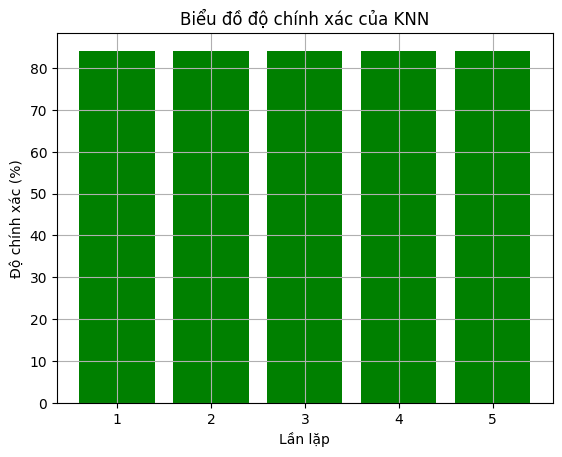

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import random
import matplotlib.pyplot as plt

num_loop = 5
average = 0

# Đọc dữ liệu từ tệp
url = './data_statlog/sat.trn'
sat_train = pd.read_csv(url, header=None, sep=' ')

url = './data_statlog/sat.tst'
sat_test = pd.read_csv(url, header=None, sep=' ')

# Phân chia dữ liệu
X_train = sat_train.iloc[:, :-1]
y_train = sat_train.iloc[:, -1]
X_test = sat_test.iloc[:, :-1]
y_test = sat_test.iloc[:, -1]

# Chuyển đổi sang NumPy array
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()


for ringloop in range(num_loop):
    k = random.randint(100, 150)
    print('-------------------------------')
    print(f'Lần lặp thứ {ringloop + 1}: Sử dụng K = {k}')

    # Tạo Mô Hình KNN
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # Huấn luyện KNN
    knn_model.fit(X_train, y_train)

    # Dự đoán nhãn
    y_pred = knn_model.predict(X_test)

    # Đo lường hiệu suất tỷ lệ chính xác
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Do chinh xac: {accuracy*100:.2f}%')
    print('-------------------------------')
    # Cập nhật biến
    average += accuracy

# Trung bình tổng
average /= num_loop
print(f'Trung binh tong cua giai thuat KNN la : {average*100:.2f}%')

# Vẽ biểu đồ cho accuracy
iterations = range(1, num_loop + 1)
accuracies = [average * 100] * num_loop

plt.bar(iterations, accuracies, color='green',)
plt.xlabel('Lần lặp')
plt.ylabel('Độ chính xác (%)')
plt.title('Biểu đồ độ chính xác của KNN')
plt.grid(True)
plt.show()


----------Bayes----------
Độ chính xác của Multinomial Naive Bayes (Lần 1): 0.7685
Báo cáo phân loại cho Multinomial Naive Bayes (Lần 1):
              precision    recall  f1-score   support

           1       0.97      0.99      0.98       461
           2       0.98      0.88      0.93       224
           3       0.66      0.83      0.73       397
           4       0.31      0.04      0.08       211
           5       0.76      0.70      0.73       237
           7       0.65      0.80      0.72       470

    accuracy                           0.77      2000
   macro avg       0.72      0.71      0.70      2000
weighted avg       0.74      0.77      0.74      2000

Độ chính xác của Multinomial Naive Bayes (Lần 2): 0.7685
Báo cáo phân loại cho Multinomial Naive Bayes (Lần 2):
              precision    recall  f1-score   support

           1       0.97      0.99      0.98       461
           2       0.98      0.88      0.93       224
           3       0.66      0.83      0.73 

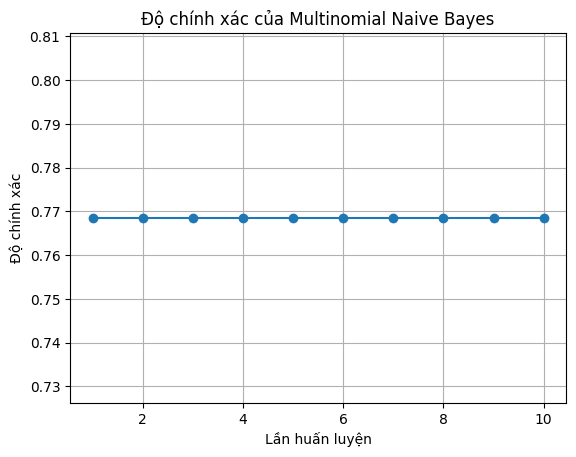

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

num_iterations = 10
accuracies = []  # Danh sách để lưu trữ độ chính xác từ mỗi lần huấn luyện

# Đọc dữ liệu từ tệp
url = './data_statlog/sat.trn'
sat_train = pd.read_csv(url, header=None, sep=' ')

url = './data_statlog/sat.tst'
sat_test = pd.read_csv(url, header=None, sep=' ')

# Phân chia dữ liệu
X_train = sat_train.iloc[:, :-1]
y_train = sat_train.iloc[:, -1]
X_test = sat_test.iloc[:, :-1]
y_test = sat_test.iloc[:, -1]

print('----------Bayes----------')
for i in range(num_iterations):
    from sklearn.naive_bayes import MultinomialNB

    # Multinomial Naive Bayes
    mnb = MultinomialNB()
    mnb.fit(X_train, y_train)

    # Dự đoán
    y_pred_mnb = mnb.predict(X_test)

    # Đánh giá mô hình
    from sklearn.metrics import accuracy_score, classification_report

    accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
    accuracies.append(accuracy_mnb)  # Thêm độ chính xác vào danh sách accuracies
    print(f"Độ chính xác của Multinomial Naive Bayes (Lần {i + 1}): {accuracy_mnb}")

    # Tạo báo cáo phân loại
    report_mnb = classification_report(y_test, y_pred_mnb)
    print(f"Báo cáo phân loại cho Multinomial Naive Bayes (Lần {i + 1}):")
    print(report_mnb)

# Vẽ biểu đồ hoặc thực hiện các thao tác khác dựa trên giá trị trong accuracies
plt.plot(range(1, num_iterations + 1), accuracies, marker='o', linestyle='-')
plt.title('Độ chính xác của Multinomial Naive Bayes')
plt.xlabel('Lần huấn luyện')
plt.ylabel('Độ chính xác')
plt.grid(True)
plt.show()
